## Problem Statement

Bike sharing systems are a new generation of traditional bike rentals where the entire process from membership, rental, and return back has become automatic. Users are able to easily rent a bike from a specific position and return it to another position. These systems are prevalent worldwide and play a significant role in traffic, environmental, and health-related issues. In addition to their real-world applications, the data generated by these systems offers valuable insights for research.

### Goal
The goal of this project is to build an end-to-end regression task that predicts the daily bike rental count based on environmental and seasonal settings. The dataset includes information about factors such as weather conditions, season, year, month, day of the week, and more. The core dataset is related to the Capital Bikeshare system in Washington D.C., USA, and includes features that are highly correlated with bike rental behaviors.

### Dataset Characteristics

The dataset includes the following fields:

- `instant`: Record index
- `dteday`: Date
- `season`: Season (1:spring, 2:summer, 3:fall, 4:winter)
- `yr`: Year (0: 2011, 1:2012)
- `mnth`: Month (1 to 12)
- `holiday`: Indicates whether the day is a holiday or not
- `weekday`: Day of the week
- `workingday`: If the day is neither a weekend nor a holiday, it is 1; otherwise, it is 0.
- `weathersit`: Weather situation category
    1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp`: Normalized temperature in Celsius
- `atemp`: Normalized feeling temperature in Celsius
- `hum`: Normalized humidity
- `windspeed`: Normalized wind speed
- `casual`: Count of casual users
- `registered`: Count of registered users
- `cnt`: Count of total rental bikes, including both casual and registered users

### Tasks

- Perform data exploration and preprocessing, including handling missing values and encoding categorical variables.
- Choosing relevant features and potentially create new ones.
- Selecting an appropriate regression algorithm and train a predictive model.
- Evaluate the model's performance using appropriate metrics.
- Interpret the model's insights to understand factors influencing daily bike rentals.
- Integrating MLflow for experiment tracking and DVC for data version control.

### Expected Outcome

The project aims to provide a regression model capable of accurately predicting the daily bike rental count based on various environmental and seasonal settings. Additionally, the project encourages exploration of model interpretation techniques and the integration of MLflow and DVC for enhanced development and deployment workflows.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# getting the daily dataset
df = pd.read_csv("../dataset/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
# there 731 entries or records and 16 features. 
# we cann't see any null values from the info
# there dtday column which is suppose to be date column but is a categorical column
# the instant column is index column which we can drop off 

In [5]:
# checking for null values
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# we can confirm the no null or missing values in dataset

In [7]:
# making copy of dataframe and droping instant  column
df_copy = df.copy()
df_copy.drop(labels = ['instant'] ,axis = 1,inplace= True )

In [8]:
# converting the dteday column into date column 
df_copy['dteday'] = pd.to_datetime(df_copy['dteday'])

In [9]:
df_copy.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [10]:
# Unique values:
df_copy.apply(lambda x: len(x.unique()))

dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [11]:
columns = ['season', 'yr', 'holiday', 'weekday','mnth', 'workingday', 'weathersit']
for i in columns:
    print(df_copy[i].value_counts())
    print("*" * 39)

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64
***************************************
yr
1    366
0    365
Name: count, dtype: int64
***************************************
holiday
0    710
1     21
Name: count, dtype: int64
***************************************
weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64
***************************************
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: count, dtype: int64
***************************************
workingday
1    500
0    231
Name: count, dtype: int64
***************************************
weathersit
1    463
2    247
3     21
Name: count, dtype: int64
***************************************


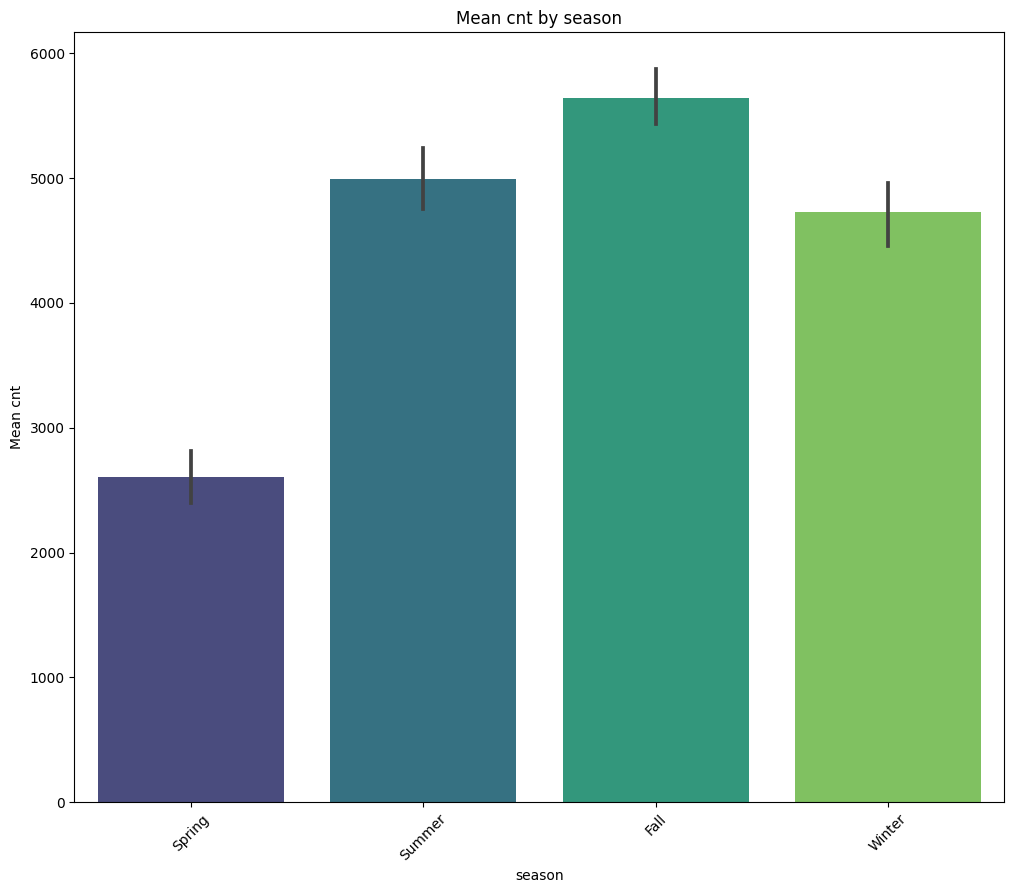

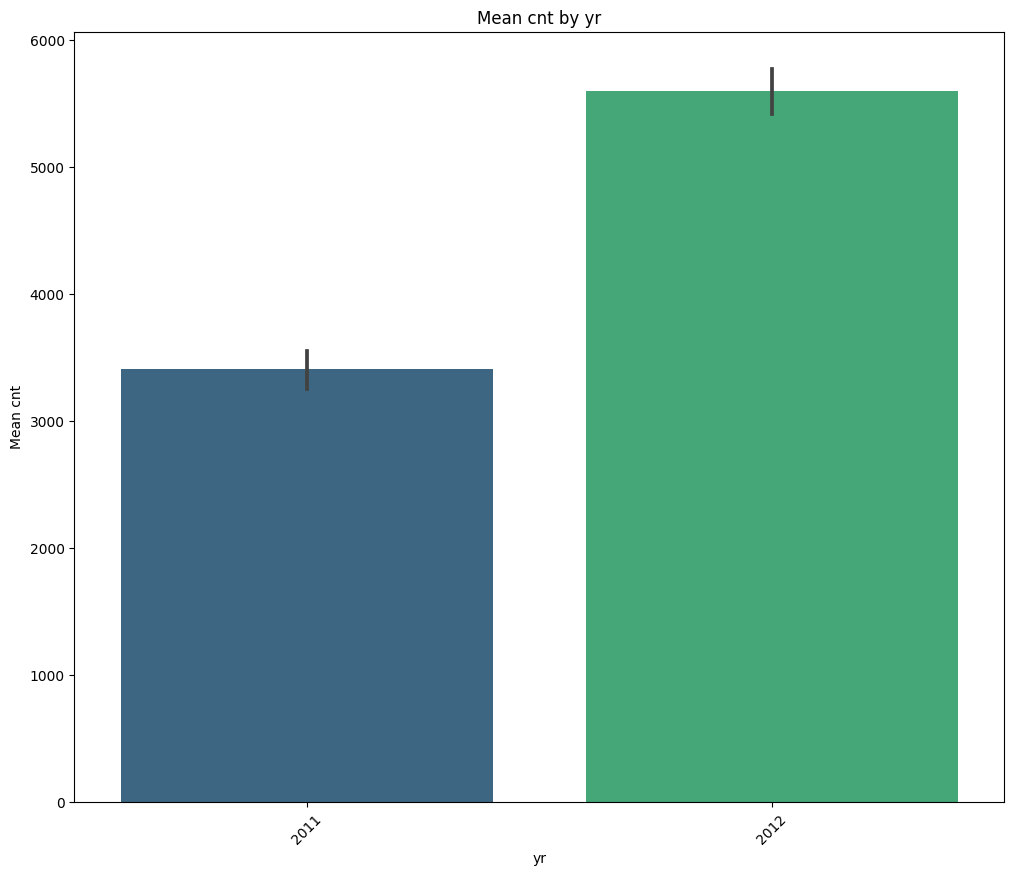

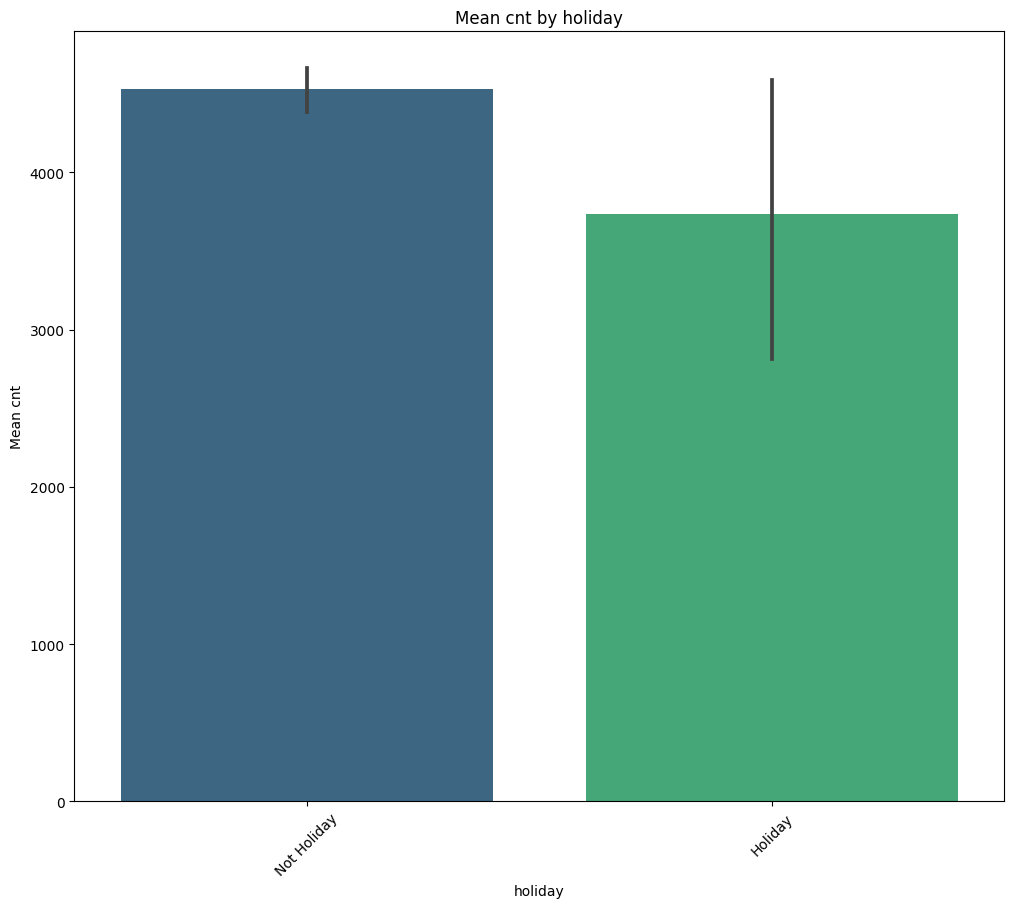

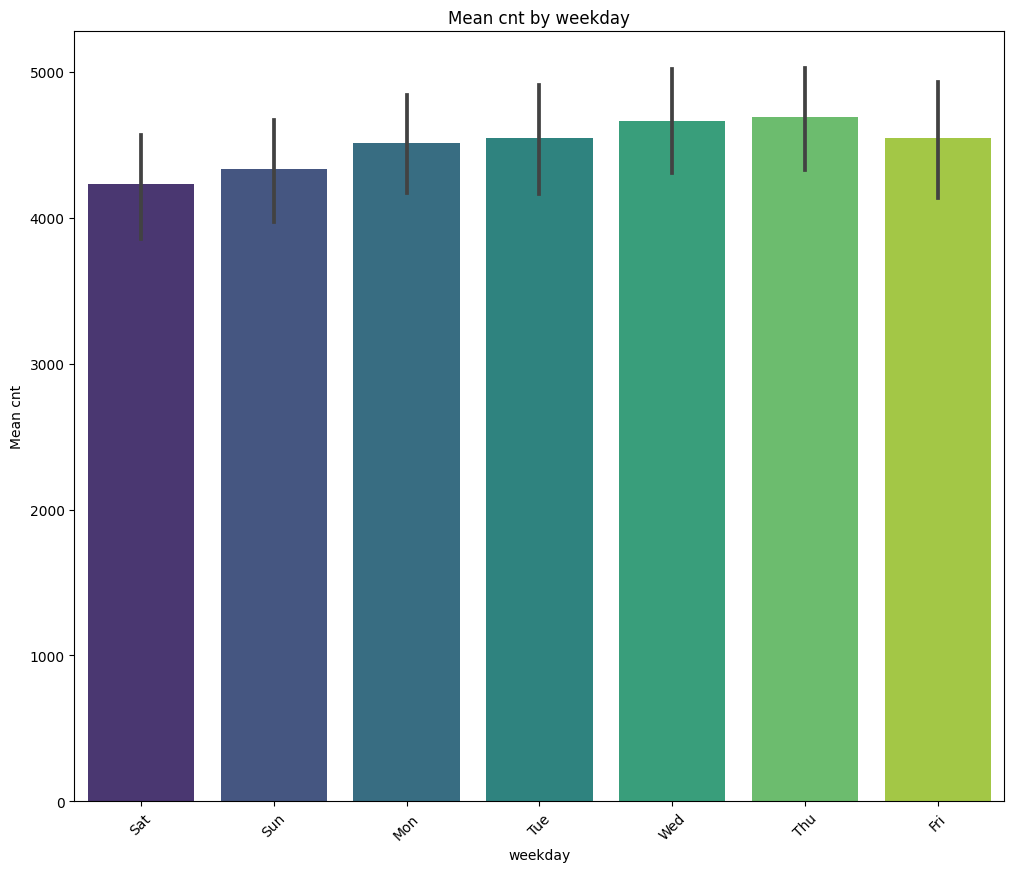

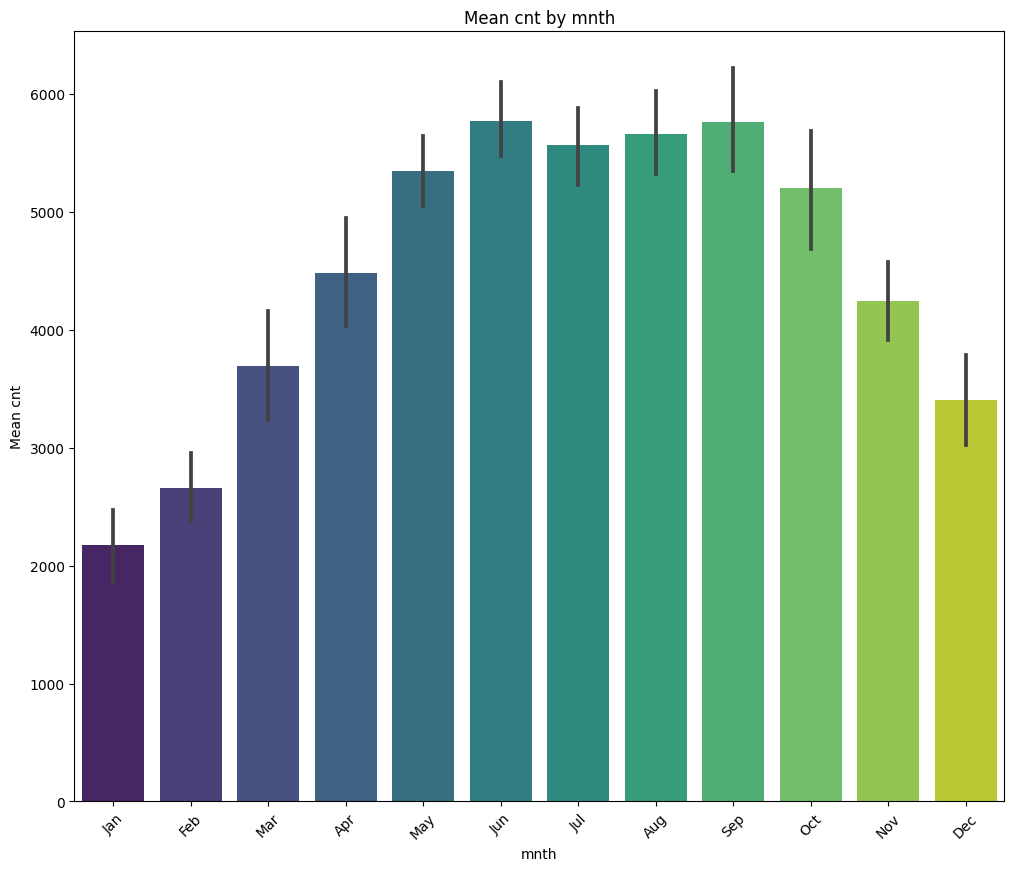

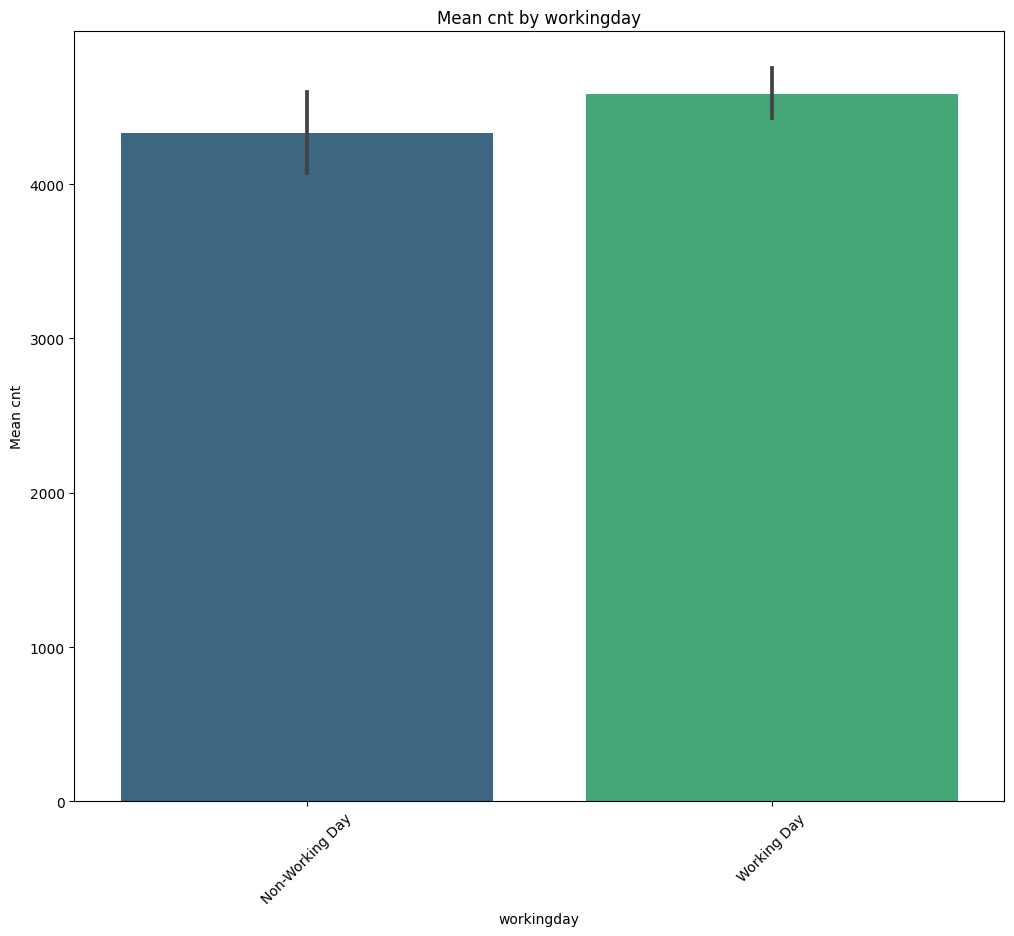

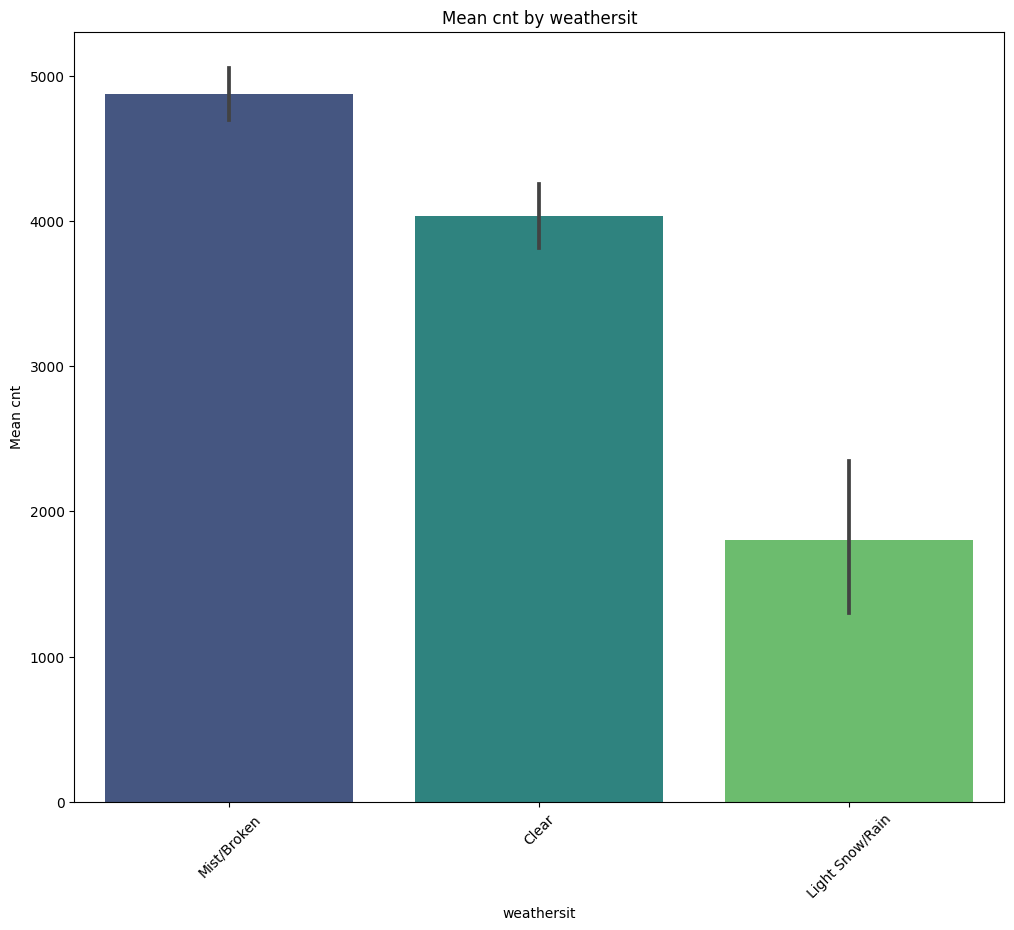

In [12]:
# Mapping for custom labels
labels_mapping = {
    'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'yr': {0: '2011', 1: '2012'},
    'mnth': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'},
    'holiday': {0: 'Not Holiday', 1: 'Holiday'},
    'weekday': {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'},
    'workingday': {0: 'Non-Working Day', 1: 'Working Day'},
    'weathersit': {1: 'Clear', 2: 'Mist/Broken', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Fog'}
}

# List of columns to plot
columns = ['season', 'yr', 'holiday', 'weekday', 'mnth', 'workingday', 'weathersit']

# Loop through columns and create separate bar plots
for col in columns:
    plt.figure(figsize=(12, 10))
    sns.barplot(data=df_copy, x=col, y='cnt', palette='viridis')
    plt.title(f"Mean cnt by {col}")
    plt.xlabel(col)
    plt.ylabel("Mean cnt")
    
      # Set custom labels if available
    if col in labels_mapping:
        tick_labels = [labels_mapping[col].get(x, x) for x in df_copy[col].unique()]
        plt.xticks(ticks=range(len(tick_labels)), labels=tick_labels)
    
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()


-

### Seasons
1. The fall season has the highest bike rental, followed by the summer season.
2. The winter season exhibits the lowest bike rental. This could be due to the colder conditions, as people may opt for cars instead.

### Year
1. There is an observable growth in bike rentals from 2011 to 2012.

### Holidays
1. Bike rentals are more frequent on working days, possibly due to it being a cost-effective and convenient mode of transport for the working population.

### Weekdays
1. Most weekdays show a similar pattern of bike rentals, except for Saturday and Sunday, which are weekends.

### Months
1. The period from June to September experiences the highest bike rentals, indicating a peak in demand during these months.

### Working Day
1. Similar to the pattern observed with holidays, working days see higher bike rentals compared to non-working days.

### Weather Conditions
1. People prefer renting bikes on clear or cloudy days rather than during light snow or light rain. There's a noticeable drop in bike rentals during heavy rain or snow, which is understandable given the difficulty of rididditions you'd like to make.

In [13]:
# so as we are trying to predict count of bike to be rented the yr column is not going to be useful as we moths column which gives more in depth insight about which month is more bikes are rented
# and date column also we can drop as we have working days, holidays columns

df_copy.drop(labels = [ 'dteday' , 'yr'] ,axis= 1 ,inplace= True)

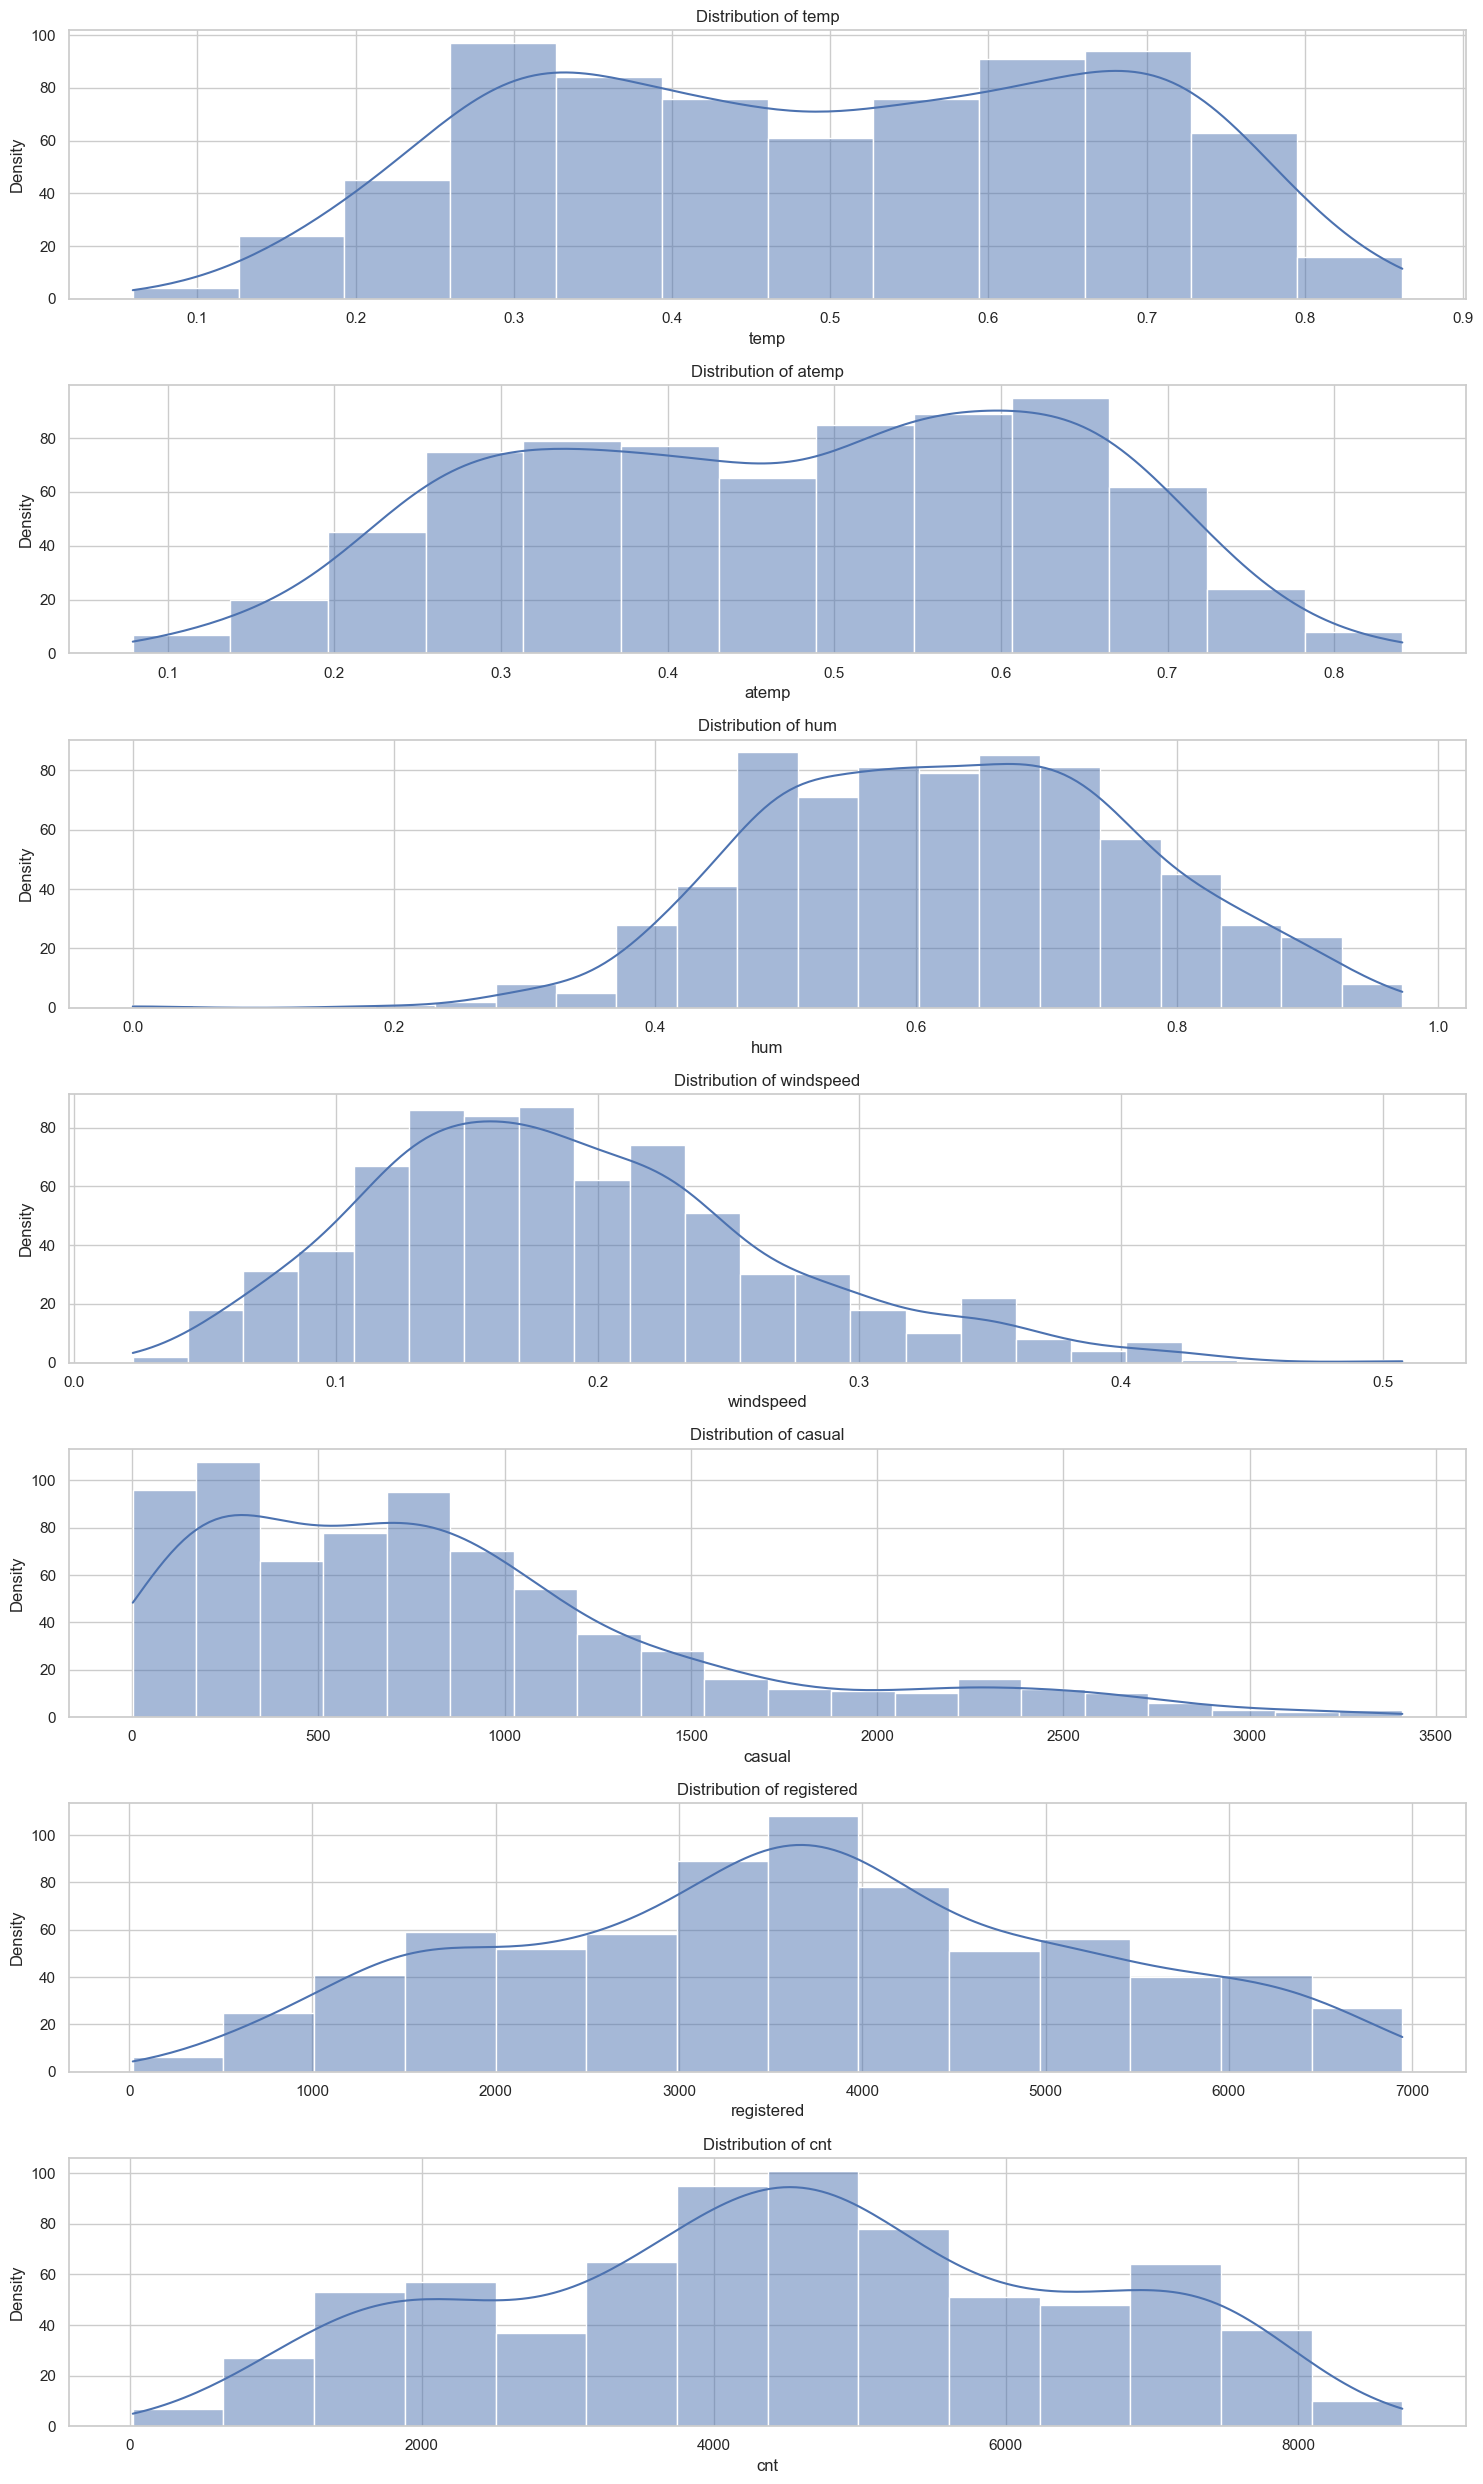

In [14]:
# List of numerical features
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Create subplots
num_plots = len(numerical_features)

plt.figure(figsize=(15, 25))
sns.set(style="whitegrid")

# Loop through numerical features and create distribution plots
for i, feature in enumerate(numerical_features):
    plt.subplot(num_plots, 1, i + 1)
    sns.histplot(df_copy[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

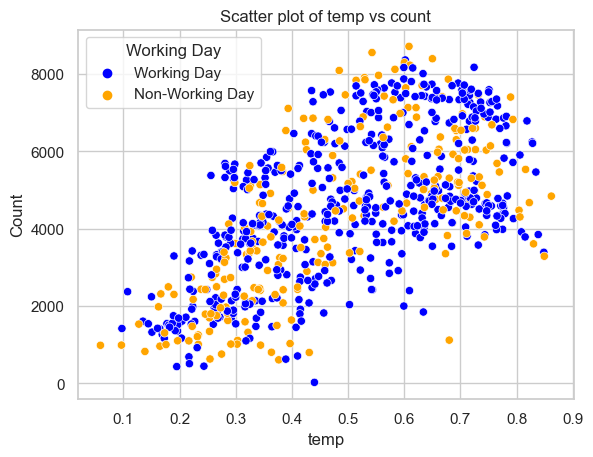

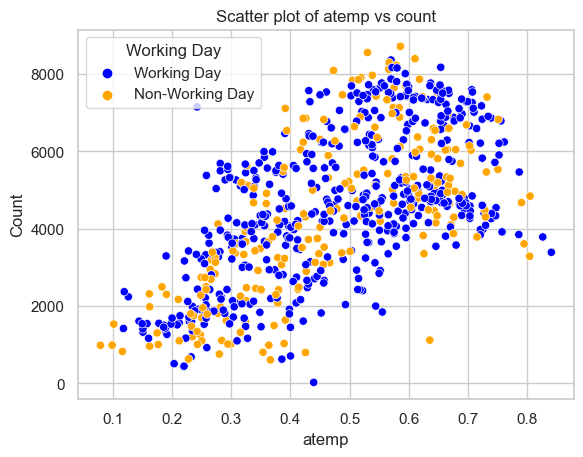

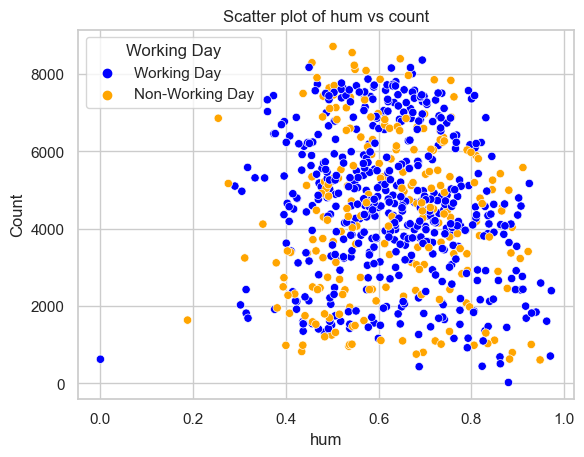

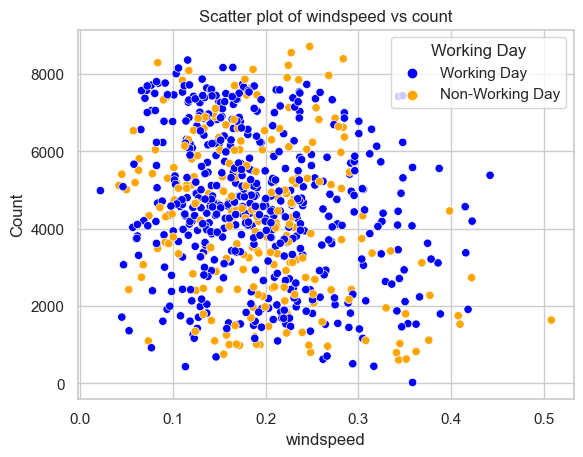

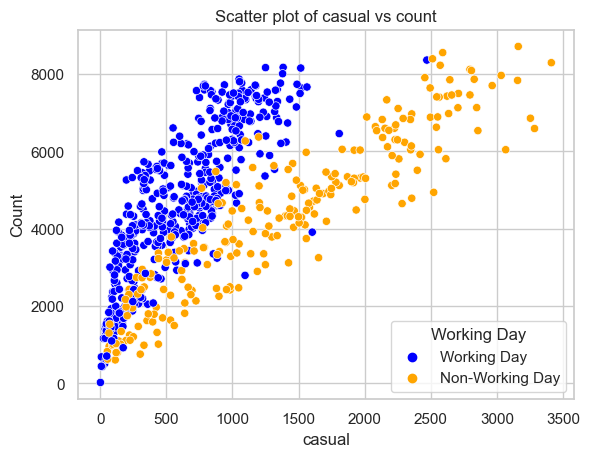

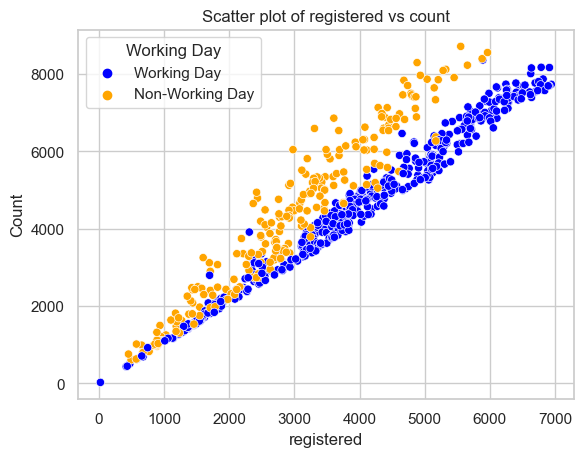

In [15]:
# List of continuous columns
cont_col = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

# Plotting graph between count and continuous columns with working_day as hue
for i in cont_col:
    sns.scatterplot(data=df_copy, x=i, y='cnt', hue='workingday', hue_order=[1, 0],
                    palette={1: 'blue', 0: 'orange'})  # Customizing colors
    plt.title(f"Scatter plot of {i} vs count")
    plt.xlabel(i)
    plt.ylabel("Count")
    
    # Adding custom labels to the legend
    legend_labels = {1: 'Working Day', 0: 'Non-Working Day'}
    handles, _ = plt.gca().get_legend_handles_labels()
    plt.legend(handles=handles, labels=[legend_labels[val] for val in [1, 0]], title='Working Day')
    
    plt.show()

### Scatter plots
1. Bike rentals tend to be higher on both working days and non-working days when the temperature and feeling temperature are in the range of 10 to 30 Celsius.
2. There's no distinct trend between humidity and bike rentals, the relationship appears to be less significant.
3. Bike rentals are relatively higher on both working days and non-working days when wind speeds are lower (0 to 20).
4. The scatter points for casual users are more evenly distributed across counts, while registered user counts tend to be higher, especially on working days.
5. Both working days and non-working days show a concentration of bike rentals with higher registered user counts.

In [16]:
df_copy.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [59]:
#df_copy.drop(labels= [ 'temp_bin', 'windspeed_bin']  ,axis = 1 ,inplace= True)

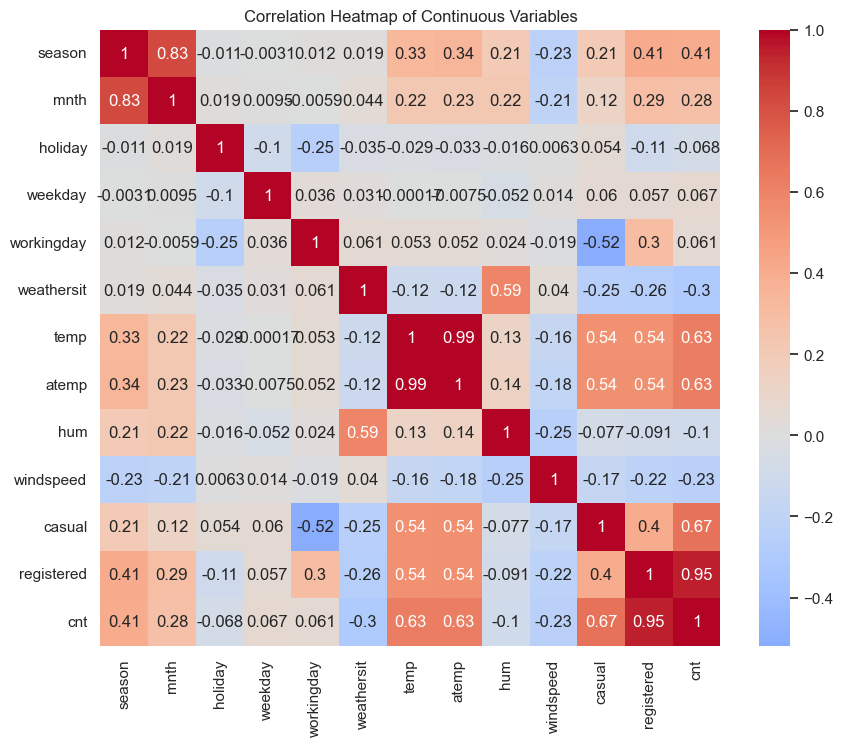

In [60]:
# heatmap
# Calculate the correlation matrix
correlation_matrix = df_copy.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()

### heatmap
1. We can see that Both "casual" and "registered" users are positively correlated with the target variable "cnt" (bike rentals).
2. temperature and feel temperature have the same positive relation with cnt and also both have a lot of similarities so we can drop one column from them
3.  The number of registered users has a higher positive correlation with bike rentals compared to casual users.
4.  Humidity and wind speed doesn't show a strong correlation

### Summary
1. Both "casual" and "registered" users contribute to bike rentals. Registered users might be more regular riders who use the bike-sharing system for their daily transport
2. Comfortable temperature ranges (10 to 30 Celsius) likely encourage bike usage, both on working days and non-working days.
3. Humidity and wind speed do not have a significant impact on bike rental
4. Clear and cloudy days are considered ideal for outdoor activities, as they offer better visibility and less chance of rain.
5. The fall season has the highest bike rentals as the weather is cooler, making outdoor activities more enjoyable. The winter season has fewer rentals due to colder temperatures, which may discourage bike usage.
6. Bike rentals are higher on working days as commuters might use the bike-sharing system to avoid traffic congestion, save money, and contribute to their overall health and well-being.
7. The peak bike rentals during June to September align with warmer weather and summer vacations. 